In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
election = pd.read_csv('https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_1127/trump_data.csv',
                      encoding='latin-1')

In [4]:
election

,Unnamed: 0,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share
0,0,55221.0,51281.0,"Autauga County, Alabama",1,1,1001.0,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358
1,5,195121.0,50254.0,"Baldwin County, Alabama",3,1,1003.0,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515
2,10,26932.0,32964.0,"Barbour County, Alabama",5,1,1005.0,AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714
3,15,22604.0,38678.0,"Bibb County, Alabama",7,1,1007.0,AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662
4,20,57710.0,45813.0,"Blount County, Alabama",9,1,1009.0,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519
5,25,10678.0,31938.0,"Bullock County, Alabama",11,1,1011.0,AL,alabama,1011,Bullock,4701,GOP,Trump,1139.0,both,0.242289
6,30,20354.0,32229.0,"Butler County, Alabama",13,1,1013.0,AL,alabama,1013,Butler,8685,GOP,Trump,4891.0,both,0.563155
7,35,116648.0,41703.0,"Calhoun County, Alabama",15,1,1015.0,AL,alabama,1015,Calhoun,47376,GOP,Trump,32803.0,both,0.692397
8,40,34079.0,34177.0,"Chambers County, Alabama",17,1,1017.0,AL,alabama,1017,Chambers,13778,GOP,Trump,7803.0,both,0.566338
9,45,26008.0,36296.0,"Cherokee County, Alabama",19,1,1019.0,AL,alabama,1019,Cherokee,10503,GOP,Trump,8809.0,both,0.838713


In [5]:
from sklearn.linear_model import LinearRegression as reg

In [6]:
import patsy

In [36]:
y,X = patsy.dmatrices('trump_share ~ np.log(population) + income',data=election)

In [37]:
X

DesignMatrix with shape (3111, 3)
  Intercept  np.log(population)  income
          1            10.91910   51281
          1            12.18138   50254
          1            10.20107   32964
          1            10.02588   38678
          1            10.96319   45813
          1             9.27594   31938
          1             9.92103   32229
          1            11.66692   41703
          1            10.43644   34177
          1            10.16616   36296
          1            10.68782   41627
          1             9.50264   33536
          1            10.12943   32011
          1             9.51318   35327
          1             9.61594   38056
          1            10.83730   46729
          1            10.90493   40576
          1             9.46227   24900
          1             9.30810   31212
          1            10.54234   36444
          1             9.54237   36022
          1            11.30177   38971
          1            10.81709   45028
      

In [38]:
reg().fit(X,y).score(X,y)

0.2514984656764898

In [39]:
reg().fit(X,y).predict(X)

array([[0.60188358],
       [0.53464647],
       [0.6414074 ],
       ...,
       [0.65325673],
       [0.70253912],
       [0.71043394]])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [42]:
len(X_train)

2488

In [43]:
len(y_train)

2488

In [44]:
len(X_test)

623

In [45]:
len(y_test)

623

In [46]:
reg().fit(X_train,y_train).score(X_test,y_test)

0.24728254148391948

In [47]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(reg(),X,y,cv=5).mean()

0.23688388925272053

In [51]:
pd.DataFrame(X)

,0,1,2
0,1.0,10.919099,51281.0
1,1.0,12.181375,50254.0
2,1.0,10.201070,32964.0
3,1.0,10.025882,38678.0
4,1.0,10.963186,45813.0
5,1.0,9.275941,31938.0
6,1.0,9.921033,32229.0
7,1.0,11.666916,41703.0
8,1.0,10.436437,34177.0
9,1.0,10.166159,36296.0


In [58]:
# X[:,1:]

In [59]:
from sklearn.ensemble import RandomForestRegressor as rf

In [67]:
cross_val_score(rf(n_estimators=50),X,np.ravel(y),cv=5).mean()

0.15873016429596004

In [65]:
np.ravel(y)

array([0.73435789, 0.77351472, 0.52271415, ..., 0.76418726, 0.78358008,
       0.86922615])

In [68]:
cross_val_score(rf(),X,np.ravel(y),cv=5).mean()

0.12968241213324566

In [69]:
cross_val_score(rf(max_depth=5),X,np.ravel(y),cv=5).mean()

0.2740157060946699

In [70]:
cross_val_score(rf(max_depth=10),X,np.ravel(y),cv=5).mean()

0.22851676988231703

In [71]:
cross_val_score(rf(max_depth=2),X,np.ravel(y),cv=5).mean()

0.19875947010764192

In [75]:
for i in range(1,10):
    print(i,cross_val_score(rf(n_estimators=200,max_depth=i),X,np.ravel(y),cv=5).mean())

1 0.19376357391027407
2 0.21237628598851405
3 0.2646365962240391
4 0.2776987371059867
5 0.27723990651177893
6 0.2734540244561968
7 0.275932766049344
8 0.26518980725164126
9 0.2579017741543508


In [74]:
cross_val_score(reg(),X,np.ravel(y),cv=5).mean()

0.2368838892527206

In [76]:
from sklearn.neighbors import KNeighborsRegressor as knn

In [79]:
cross_val_score(knn(),X,np.ravel(y),cv=5).mean()

-0.16952370450425275

In [84]:
cross_val_score(knn(30),X,np.ravel(y),cv=5).mean()

0.018916205804657006

In [105]:
X

DesignMatrix with shape (3111, 3)
  Intercept  np.log(population)    income
          1             0.43221   0.38095
          1             1.29414   0.29624
          1            -0.05808  -1.12981
          1            -0.17770  -0.65853
          1             0.46232  -0.07005
          1            -0.68978  -1.21443
          1            -0.24930  -1.19043
          1             0.94285  -0.40903
          1             0.10264  -1.02976
          1            -0.08192  -0.85499
          1             0.27429  -0.41530
          1            -0.53499  -1.08263
          1            -0.10700  -1.20841
          1            -0.52779  -0.93491
          1            -0.45762  -0.70983
          1             0.37636   0.00550
          1             0.42254  -0.50198
          1            -0.56256  -1.79491
          1            -0.66782  -1.27431
          1             0.17495  -0.84278
          1            -0.50786  -0.87759
          1             0.69352  -0.63436


In [103]:
X_df = pd.DataFrame(X)

In [118]:
X_df

X_df[1] = (X_df[1]- X_df[1].mean())/X_df[1].std()
X_df[2] = (X_df[2]- X_df[2].mean())/X_df[2].std()

X_df[1] = X_df[1]


In [119]:
X_df.mean()

0    1.000000e+00
1   -2.144790e-16
2    1.056336e-17
dtype: float64

In [120]:
X_df.std()

0    0.0
1    1.0
2    1.0
dtype: float64

In [121]:
cross_val_score(knn(),X_df,np.ravel(y),cv=5).mean()

0.16594363268615955

In [122]:
cross_val_score(knn(70),X_df,np.ravel(y),cv=5).mean()

0.29393665155504956

In [123]:
for i in range(5,100,5):
    print(i,cross_val_score(knn(i),X_df,np.ravel(y),cv=5).mean())

5 0.16594363268615955
10 0.23909127897859203
15 0.25671940857677433
20 0.2727467421103339
25 0.2837713670907236
30 0.28579319231563083
35 0.2875233844473263
40 0.28857196013199593
45 0.29174995426583167
50 0.29365543540601724
55 0.2941004896702088
60 0.29507614082127487
65 0.2948122273967525
70 0.29393665155504956
75 0.2935729746646715
80 0.29230129709987623
85 0.2927443681053122
90 0.2916907300542263
95 0.2902175945304322


In [125]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import datetime as dt           # date tools, used to note current date  

# these are new 
import os                       # operating system tools (check files)
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools

In [126]:
url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
r = requests.get(url) 
mlz = zf.ZipFile(io.BytesIO(r.content)) 
mlz.namelist()

['ml-latest-small/',
 'ml-latest-small/links.csv',
 'ml-latest-small/tags.csv',
 'ml-latest-small/ratings.csv',
 'ml-latest-small/README.txt',
 'ml-latest-small/movies.csv']

In [127]:
movies = pd.read_csv(mlz.open('ml-latest-small/movies.csv'))

In [128]:
ratings = pd.read_csv(mlz.open('ml-latest-small/ratings.csv'))

In [129]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [130]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [132]:
ratings.groupby('userId')[['rating']].mean()

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
6,3.493631
7,3.230263
8,3.574468
9,3.260870


In [135]:
ratings2 = ratings.merge(movies,
              on='movieId',
              how='inner')

In [140]:
ratings2['ave_rating_user'] = ratings2.groupby('userId')['rating'].transform('mean')

In [141]:
ratings2

,userId,movieId,rating,timestamp,title,genres,ave_rating_user
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.366379
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.636364
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.230263
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.448148
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.209524
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.732072
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.607397
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.260722
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.548148
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920000


In [148]:
movies2 = ratings2.groupby(['movieId','title','genres'],as_index=False).agg({'rating':'mean',
                                                                             'ave_rating_user':'mean','userId':'count'})

In [152]:
movies3 = movies2.loc[movies2['userId']>30]

In [154]:
movies3

,movieId,title,genres,rating,ave_rating_user,userId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.608763,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.484976,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.494413,52
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.594055,49
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.567618,102
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.585913,54
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.552538,132
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,3.570179,70
15,16,Casino (1995),Crime|Drama,3.926829,3.530499,82
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119,3.566997,67


In [158]:
movies3['year'] = movies3['title'].str[-5:-1].astype(int)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
movies3

,movieId,title,genres,rating,ave_rating_user,userId,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.608763,215,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.484976,110,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.494413,52,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.594055,49,1995
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.567618,102,1995
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.585913,54,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.552538,132,1995
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,3.570179,70,1995
15,16,Casino (1995),Crime|Drama,3.926829,3.530499,82,1995
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119,3.566997,67,1995


In [160]:
y,X = patsy.dmatrices('rating ~ ave_rating_user + userId + year',data=movies3)

In [162]:
X

DesignMatrix with shape (860, 4)
  Intercept  ave_rating_user  userId  year
          1          3.60876     215  1995
          1          3.48498     110  1995
          1          3.49441      52  1995
          1          3.59405      49  1995
          1          3.56762     102  1995
          1          3.58591      54  1995
          1          3.55254     132  1995
          1          3.57018      70  1995
          1          3.53050      82  1995
          1          3.56700      67  1995
          1          3.48587      88  1995
          1          3.48293      89  1995
          1          3.31066      36  1995
          1          3.58961      76  1995
          1          3.61837      38  1995
          1          3.46634      38  1995
          1          3.58590     177  1995
          1          3.51730     128  1995
          1          3.64596      67  1995
          1          3.51705     104  1995
          1          3.43569      46  1995
          1          

In [163]:
cross_val_score(reg(),X,y,cv=5).mean()

0.3897157000889945

In [164]:
import statsmodels.formula.api as smf

In [166]:
print(smf.ols('rating ~ ave_rating_user + userId + year',data=movies3).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     293.1
Date:                Wed, 26 Jun 2019   Prob (F-statistic):          7.51e-131
Time:                        19:56:52   Log-Likelihood:                -136.71
No. Observations:                 860   AIC:                             281.4
Df Residuals:                     856   BIC:                             300.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3611      1.497     

In [168]:
cross_val_score(rf(),X,np.ravel(y),cv=5).mean()

0.34430655836841323

In [170]:
for i in range(1,10):
    print(i,cross_val_score(rf(n_estimators=100,max_depth=i),X,np.ravel(y),cv=5).mean())

1 0.2867112111273447
2 0.3295101407922916
3 0.37581910149517384
4 0.4072748091432463
5 0.433346258804553
6 0.42682524948387535
7 0.42599179031841156
8 0.41927540077945685
9 0.4110736779823367


In [171]:
movies3

,movieId,title,genres,rating,ave_rating_user,userId,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.608763,215,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.484976,110,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.494413,52,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.594055,49,1995
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.567618,102,1995
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.585913,54,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.552538,132,1995
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,3.570179,70,1995
15,16,Casino (1995),Crime|Drama,3.926829,3.530499,82,1995
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119,3.566997,67,1995


In [175]:
movies3['genres'].str.split('|').str[0].unique()

array(['Adventure', 'Comedy', 'Action', 'Crime', 'Drama', 'Mystery',
       'Children', 'Animation', 'Horror', 'Thriller', 'Film-Noir',
       'Musical', 'Fantasy', 'Documentary', 'Sci-Fi'], dtype=object)

In [176]:
for i in movies3['genres'].str.split('|').str[0].unique():
    movies3[i] = 0
    movies3.loc[movies3['genres'].str.contains(i),i] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [177]:
movies3

,movieId,title,genres,rating,ave_rating_user,userId,year,Adventure,Comedy,Action,...,Mystery,Children,Animation,Horror,Thriller,Film-Noir,Musical,Fantasy,Documentary,Sci-Fi
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.608763,215,1995,1,1,0,...,0,1,1,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.484976,110,1995,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.494413,52,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.594055,49,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.567618,102,1995,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.585913,54,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.552538,132,1995,1,0,1,...,0,0,0,0,1,0,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,3.570179,70,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),Crime|Drama,3.926829,3.530499,82,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119,3.566997,67,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
X2 = movies3.iloc[:,4:]

In [182]:
cross_val_score(reg(),X,y,cv=5).mean()

0.3897157000889913

In [183]:
cross_val_score(reg(),X2,y,cv=5).mean()

0.4068876814730954

In [184]:
for i in range(1,10):
    print(i,cross_val_score(rf(n_estimators=100,max_depth=i),X,np.ravel(y),cv=5).mean())

1 0.28177743920114756
2 0.3335715441964236
3 0.370978806529228
4 0.40975486743918665
5 0.43286108103774695
6 0.4293860231839755
7 0.42235388082799685
8 0.4227110323779514
9 0.41380859143774795


In [186]:
for i in range(7,15):
    print(i,cross_val_score(rf(n_estimators=100,max_depth=i),X2,np.ravel(y),cv=5).mean())

7 0.46944549264125185
8 0.4799099128659778
9 0.486925827116688
10 0.47661359342460025
11 0.4723544701852023
12 0.47972329882243675
13 0.46927310861249316
14 0.47389147617711574


In [187]:
movies3

,movieId,title,genres,rating,ave_rating_user,userId,year,Adventure,Comedy,Action,...,Mystery,Children,Animation,Horror,Thriller,Film-Noir,Musical,Fantasy,Documentary,Sci-Fi
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.608763,215,1995,1,1,0,...,0,1,1,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.484976,110,1995,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.494413,52,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.594055,49,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.567618,102,1995,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.585913,54,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.552538,132,1995,1,0,1,...,0,0,0,0,1,0,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,3.570179,70,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),Crime|Drama,3.926829,3.530499,82,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119,3.566997,67,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
movies3.loc[movies3['Adventure']==1,'rating'].mean()

3.561627199864528

In [190]:
movies3['genres'].str.split('|').str[0].unique()

array(['Adventure', 'Comedy', 'Action', 'Crime', 'Drama', 'Mystery',
       'Children', 'Animation', 'Horror', 'Thriller', 'Film-Noir',
       'Musical', 'Fantasy', 'Documentary', 'Sci-Fi'], dtype=object)

In [192]:
movies3.loc[:,'Adventure':].columns

Index(['Adventure', 'Comedy', 'Action', 'Crime', 'Drama', 'Mystery',
       'Children', 'Animation', 'Horror', 'Thriller', 'Film-Noir', 'Musical',
       'Fantasy', 'Documentary', 'Sci-Fi'],
      dtype='object')

In [196]:
s = pd.Series()
for i in movies3['genres'].str.split('|').str[0].unique():
    s[i] = movies3.loc[movies3[i]==1,'rating'].mean()

In [197]:
s

Adventure      3.561627
Comedy         3.496456
Action         3.522814
Crime          3.690688
Drama          3.711501
Mystery        3.670591
Children       3.540948
Animation      3.653538
Horror         3.438503
Thriller       3.546491
Film-Noir      3.961857
Musical        3.617038
Fantasy        3.570274
Documentary    3.652765
Sci-Fi         3.472663
dtype: float64

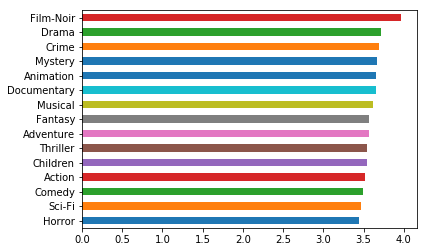

In [203]:
s.sort_values().plot.barh()

In [204]:
movies3

,movieId,title,genres,rating,ave_rating_user,userId,year,Adventure,Comedy,Action,...,Mystery,Children,Animation,Horror,Thriller,Film-Noir,Musical,Fantasy,Documentary,Sci-Fi
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.608763,215,1995,1,1,0,...,0,1,1,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.484976,110,1995,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.494413,52,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.594055,49,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.567618,102,1995,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.585913,54,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.552538,132,1995,1,0,1,...,0,0,0,0,1,0,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,3.570179,70,1995,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),Crime|Drama,3.926829,3.530499,82,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,3.776119,3.566997,67,1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0


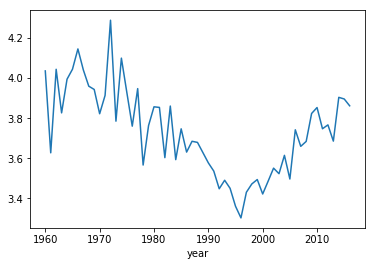

In [209]:
movies3.groupby('year')['rating'].mean().loc[1960:].plot()